# Introduction

These are my notes on statistics and quantitative methods for analysis in the social sciences.  

## Why use statistics?

As social scientists and researchers we want to answer questions about the social world.
At its most simplistic (and I completely acknowledge that I'm massively generalising here), we usually seek to describe the world or quantify the world.
For these tasks we use qualitative methods and quantitative methods respectively.

To quantify the world we might want to know things like, "how many people have been a victim of crime?", "how many people have mental health problems?", or "how many people have social science degrees?".

Sometimes we have complete (or near--complete) data about everybody in a population.
For example, in the UK the decennial (i.e. every ten years) census is a count of everybody, including certain characteristics such as health, education, and employment.
In this case the population is everybody in the UK.

More often than not it is impractical to ask everybody our questions.
Usually the cost and time required to carry out such a survey prohibit asking every single person what we want to know, but also very few people would answer everything that they were asked (the only reason everybody responds to the census is because [it's a crime not to complete the census](https://en.wikipedia.org/wiki/Census_in_the_United_Kingdom#Criminal_law) and [people have been prosecuted for not completing it](https://www.theguardian.com/uk/2012/jan/27/120-convicted-census-forms-2011)).
Instead we take a *sample* of the population, and *infer*, from our sample, what the population is like.

For example, we might ask a random sample of 1,000 people what their favourite hot drink is.
It's not that we want to know what this 1,000 people think more than any other 1,000 people.
Instead, they are our *sample* and, based on their responses, we can *infer* what the most popular hot drink is for the *population*.
In the UK, the [most popular hot drink is tea](https://www.statista.com/statistics/697383/favorite-hot-drinks-united-kingdom-uk/), but everybody knows it should be coffee.

![Coffee is clearly superior to tea](../images/coffee.jpg)

Obtaining knowledge about a *population* by *inferring* from a *sample* is the cornerstone of quantitative social science research, and uses many statistical techniques to be able to do this.
The good news is the most difficult challenge is often deciding which technique to use; using the technique is often like following a recipe.

## Packages

I use `python3` to process and analyse the data, and a number of packages install through anaconda.

In [1]:
import os
import requests
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats

## Data sources

These tutorials use a number of teaching data sets available from the [UK Data Service](https://www.ukdataservice.ac.uk/) and Nomisweb (FYI [Nomisweb have a great API](https://www.nomisweb.co.uk/api/v01/help) for reproducible research) under terms of the [Open Government License](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/):

> Office for National Statistics, University of Manchester, Cathie Marsh Institute for Social Research (CMIST), UK Data Service, 2016, Living Costs and Food Survey, 2013: Unrestricted Access Teaching Dataset, [data collection], Office for National Statistics, 2nd Edition, Office for National Statistics, [original data producer(s)]. Accessed 1 October 2018. SN: 7932, http://doi.org/10.5255/UKDA-SN-7932-2. Contains public sector information licensed under the Open Government Licence v2.0

> Office for National Statistics, 2014, 2011 Census. Accessed October 2018. Contains public sector information licensed under the Open Government Licence v2.0.

In [2]:
os.makedirs("../data/external", exist_ok=True)

if not os.path.isfile("../data/external.food.zip"):
    food = "https://beta.ukdataservice.ac.uk/Umbraco/Surface/Discover/GetDownload?studyNumber=7932&fileName=7932tab_818dcb297393b2557b07f05acaae70b9.zip"
    food = requests.get(food)
    food = food.content
    outfile = open("../data/external/food.zip", "wb")
    outfile.write(food)

if not os.path.isdir("../data/external/UKDA-7932-tab/"):
    shutil.unpack_archive("../data/external/food.zip", extract_dir = "../data/external/")

In [3]:
food = pd.read_csv(
    "../data/external/UKDA-7932-tab/tab/lcfs_2013_teaching.tab",
    sep = "\t"
)

# Check it's loaded correctly
food.head()

,casenew,weighta,P550tpr,P344pr,P425r,A172,A093r,A094r,A121r,SexHRP,A049r,G018r,G019r,Gorx,weightar
0,14999,2.834724,380.695762,465.36,1,1,4,3,1,2,4,2,3,4,0.543248
1,14993,10.077947,546.413403,855.26,1,1,1,4,3,2,2,2,1,7,1.931344
2,14993,4.088676,242.189023,160.96,1,1,1,2,3,2,1,1,1,8,0.783557
3,14984,4.571760,421.382353,656.22,1,1,1,3,3,1,2,2,1,6,0.876135
4,14981,7.349617,370.405577,398.80,1,1,1,4,3,1,1,1,1,8,1.408485


# Levels of measurement

Levels of measurement describe the nature of your data point.
They are important because they determine what statistical tests you can perform on them.
The four levels of measurement are:


## Nominal

Also known as **categorical**.
These are labels such as male/female; no religion/religion.
They have no inherent order; one response is not 'better' or 'higher' than another.
As social scientists you'll find these are pretty common.


## Ordinal

Similar to nominal in that they are labels (rather than numbers), but the labels have a rank or order.
For example, a 'strongly disagree' to 'strongly agree' scale is ordinal.
Another example would be 'guilty' and 'not guilty'.


## Interval

Interval data is numerical but does not have a meaningful zero value.
The most common example often given is temperature expressed in degrees celcius.
A temperature of 20&deg;C is not twice as hot as 10&deg;C, because 0&deg;C is arbitrary rather than based on the absence of heat.

A more common example in the social sciences is date.
Years are based on an arbitrary zero (0AD); months are based on twelve months that do not have a 'zero'; days do not have a zero and reset each month.


## Ratio

Ratio data is again numerical, but differs from interval because it has a meaningful, non--arbitrary, zero.
As we saw above dates are interval, but age in years is ratio because zero years old is the lowest age you can be.

It is more common for numerical data to be ratio than interval.
Other examples include income and number of events (e.g. number of crimes in an area).

## Discrete and continuous data

One additional thing to bear in mind for interval and ratio data is that it can be discrete or continuous.

- Discrete means it can only take on certain (discrete) values, usually integers (1, 2, 3...)
- Continuous means it can take on any numerical value (1.23, 4.56, 7.89)

Discrete data is usually count data (i.e. frequencies things occur) which are quite common in the social sciences.
It is not possible to own 1.6 cars or have 2.4 children, for example.

Continuous data can take on any value and is usually measured.
Examples include height, weight, and age (although this is usually measured on a discrete scale, number of years).

Income is the most common 'unusual' one, in that it can be a decimal (i.e. pence) but is discrete because you can only have a limited range of values less than 1.0 (i.e. you cannot have 0.3 pence).
It is, however, most commonly treated as continuous and in most models this works well.

# Central tendency

One of the first things we usually want to do is to explore and describe our data, before we begin any detailed analysis.
Measures of central tendency are one of the first things we use to describe our data.

Measures of central tendency is a fancy phrase for 'average'.
They are a single data point used to represent a 'typical' value from your data.
Depending on your level of measurement you can use one or more measures of central tendency.

## Mode

The most common value.
Mode is the only measure of central tendency you can provide for [nominal data](#Nominal).

For example, the variable `A121r` in our food data set is of household tenure type.
The available options are:

1. public rented (i.e. rented from a council)
2. private rented (i.e. rented from a landlord)
3. owned

A frequency (count) table of this variable shows that `owned` is the most common type of tenure:

In [4]:
food["A121r"] = food["A121r"].astype("category")
food["A121r"].cat.categories = ["public rented", "private rented", "owned"]
food["A121r"].value_counts()

owned             3466
public rented      880
private rented     798
Name: A121r, dtype: int64

## Median

The median is the 'middle' point.
It's only appropriate for ordered data (i.e. ordinal or numeric) and is calculated by arranging your data in order and selecting the mid--point.
`P344pr` is the gross normal weekly household income for each respondent. The following are incomes for the first five respondents as an example:

In [5]:
food["P344pr"].head()

0    465.36
1    855.26
2    160.96
3    656.22
4    398.80
Name: P344pr, dtype: float64

Note that these have been [top--coded](https://en.wikipedia.org/wiki/Top-coded), so for this example I remove the largest income, which is:

In [6]:
food["P344pr"].max()

1184.99

In [7]:
food_trimmed = food[food["P344pr"] < 1184]
food_trimmed["P344pr"].max()

1181.54

Which looks like this when we plot it as a distribution:

Text(0, 0.5, 'Frequency')

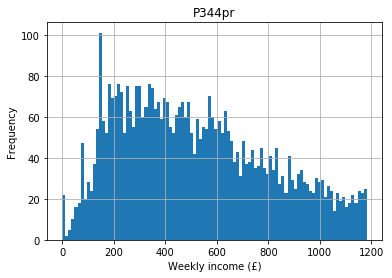

In [8]:
food_trimmed.hist("P344pr", bins = 100)
plt.xlabel("Weekly income (£)")
plt.ylabel("Frequency")

If we arrange these in order and take the middle point we obtain the median income:

In [9]:
food_trimmed["P344pr"].median()

476.799

If your data have an even number of items, the median is the mean (average) of the two middle points.
For example, using the following example data with four data points - 2, 4, 6, 8 - there is no one middle point.
Instead 4 and 6 are the middle points.
The median is the mean of these, which is $\frac{(4 + 6)}{2} = 5$.

The median is often considered more *robust* than the mean, which means it is less susceptible to outliers, for reasons we'll get to in a moment.


## Mean

The mean is what most people think of when they think of an average.
You simply "add them all up and divide by how many you have".
For example, the mean of the incomes (once we removed the top--coded income) is:

In [10]:
food_trimmed.P344pr.mean()

518.3056177244473

If the incomes were an ideal normal distribution, the mean and the median (and mode) would be identical (more on the [normal distribution](#Normal-distribution) later).
In the wild, most distributions are not exactly normal (or ideal) so the mean and the median differ, as we have seen with our example data.

If there are outliers in our data set these can affect the mean up or down.
For example, if there are a few individuals in our data that are substantially wealthier than most this can affect the mean.
The mean of the untrimmed data (i.e. with the top--coded individuals still included) is:

In [11]:
food.P344pr.mean()

620.4335721826773

These individuals have increased the mean, but do not affect the median as substantially:

In [12]:
food.P344pr.median()

563.1500000000001

For this reason we often consider the median a more *robust* measure of central tendency than the mean, and why you should be careful when someone presents a mean value without any additional information.
For comparison, a distribution of the untrimmed data looks like this:

Text(0, 0.5, 'Frequency')

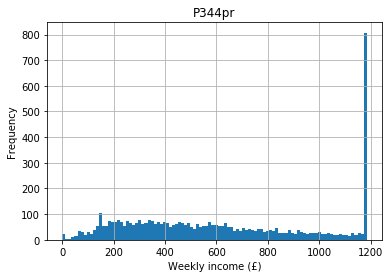

In [13]:
food.hist("P344pr", bins = 100)
plt.xlabel("Weekly income (£)")
plt.ylabel("Frequency")

# Measures of spread

We saw in the measures of [central tendency section](#Central-tendency) that the mean can be a poor representation of data if the data is skewed, and that we should therefore be careful when someone presents us with a mean (or average) without any further information.

One of the types of 'further information' that can help us is a measure of spread of the data around the mean value.
We usually use the *variance* and the *standard deviation* to quantify measure of spread.
Both are easy to calculate, and even easier to convert between each other.
We also sometimes see the range and inter--quartile range.
These are simpler to calculate, but less useful.

## Range

Simply the largest value, minus the smallest value.

In [14]:
food_trimmed.P344pr.max() - food_trimmed.P344pr.min()

1181.54

This is the full spread of the data set so doesn't tell us anything very useful in this case, and the range is very susceptible to outliers.
Therefore the inter--quartile range is more common.

## Inter--quartile range

As we saw above the range is very susceptible to outliers, so the inter--quartile range is effectively a 'trimmed' range by taking off the very lowest and the very highest values.
In fact, we take off the top 25% and the bottom 25% and specify this range.
This has the disadvantage of only describing the middle 50% of our data, but this is usually outweighed by the fact that this is less susceptible to outliers.

In [15]:
food_trimmed.P344pr.quantile(0.75) - food_trimmed.P344pr.quantile(0.25)

445.75049999999993

It's common to plot a **boxplot** to depict the range and interquartile range.

The figure below is a boxplot of the trimmed income (remember I removed the top--coded income category to create a more normal distribution).

- the mean is the green horizontal bar
- the interquartile range (representing 50% of the incomes) is the box
- the full range are the stalks (whiskers) at the very top and bottom of the figure

Text(0, 0.5, 'Income (£)')

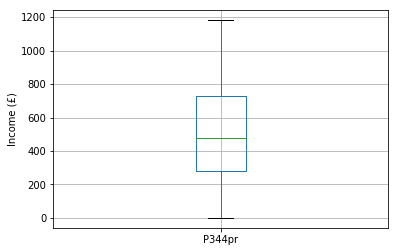

In [16]:
food_trimmed.boxplot(column = "P344pr")
plt.xlabel("")
plt.ylabel("Income (£)")

The range and inter--quartile range are useful when beginning to understand and explore your data, but are not usually reported.
Instead the variance and standard deviation are more commonly reported, because they are more useful.

## Variance

To calculate the variance:

1. subtract the mean from each score
1. square the result
1. sum the results to produce one value
1. divide by $n - 1$ (number of observations minus one)

$$
\frac{\Sigma (x - \bar{x}) ^ 2}{n-1}
$$

Using $n - 1$ rather than simply the number of observations is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).
To calculate the variance of the population we must assume that the population mean is the same as the sample mean that we have observed.
In fixing the population mean we reduce the degrees of freedom of our observations, because if we change these the final observation is determined in order for the mean to remain constant.

For example if our sample mean is 100 we assume our population mean is also 100.
If we have two observations these might be 110 and 90 (mean 100).
If we change the 110 value to 120, the 90 value *must* change to 80 to ensure the sample mean (and therefore the population mean) remains 100, so there is only one degree of freedom.
We would therefore use $2 - 1$ as the denominator in our variance calculation.

The variance of our trimmed income data is:

In [17]:
food_trimmed["P344pr"].var()

84230.34403890932

## Standard deviation

As you've probably noticed the variance is not in the units of the original data.
This is where the standard deviation comes in.
In fact the unit of the variance is the *square* of the unit of the original data.
The standard deviation is therefore a measure of spread in the units of the original data, and is calculated simply by square rooting the variance:

$$
\sqrt{\frac{\Sigma (x - \bar{x}) ^ 2}{n-1}}
$$

The standard deviation of the trimmed income is therefore:

In [18]:
food_trimmed.P344pr.std()

290.22464409300136

The standard deviation is a measure of how far the data points are on average from the mean.
A small standard deviation means the mean fairly accurately represents the data; a large standard deviation means the mean does not represent the data well.

In the case of our example the standard deviation of the income data is quite large compared to the mean, suggesting a lot of variability even in the trimmed income data. The histograms support this, and suggest the mean might not be as good as the median in summarising this data.

In fact, using properties of the normal distribution and the standard deviation we can estimate that about 95% of cases fall between:

In [19]:
food_trimmed.P344pr.mean() - 1.96 * food_trimmed.P344pr.std()

-50.53468469783536

and:

In [20]:
food_trimmed.P344pr.mean() + 1.96 * food_trimmed.P344pr.std()

1087.14592014673

This is most of the data set, so the variability of the data suggest the mean may not be a useful summary of the data.

# Standard error and confidence intervals

You can calculate a standard error of many parameters, but typically it refers to the standard error of the mean ($SE_{\bar{x}}$).
The standard error of the mean differs from the standard deviation: the standard deviation quantifies how well the sample mean fits the observed (i.e. sample) data, and the standard error of the mean quantifies how well the sample mean matches the population mean.

Because any sample we take from the population is going to be slightly different from all other samples (because everything varies) each sample mean is going to be slightly different from every other.
The standard error of the mean is a measure of how confident our sample mean matches the population mean.

One approach to calculate the standard error of the mean would be to take multiple samples.
The mean of each of these samples would form a sampling distribution due to variation: some sample means would be lower than the population mean; some sample means would be higher than the population mean; and many would be the same.
These sample mean values would form a normal distribution around the population mean.
The standard deviation of these sample means would tell us how well our sample means fit the population mean.

In practice we can usually only take one sample so we can estimate it with:

$$
\sigma_{\bar{x}} \approx \frac{s}{\sqrt{n}}
$$

where $\sigma_{\bar{x}}$ is the standard error of the population mean (the parameter we're trying to estimate), $s$ is the sample standard deviation, and $n$ is the number of observations in the sample ($\approx$ just means 'approximately equal to').

We can demonstrate this with the census (in fact, we could demonstrate this with any data set and pretend it's the population and take multiple samples from it, but why not just use an actual population?).
I'm using ages of all people in Sheffield in 2011 to illustrate this, which I download from Nomisweb:

In [21]:
if not os.path.isfile("../data/external/age.csv"):
    age = "https://www.nomisweb.co.uk/api/v01/dataset/NM_503_1.data.csv?date=latest&geography=1946157123&rural_urban=0&c_age=1...101&measures=20100&signature=NPK-0c73734c0f725c979cee3a:0xa9b892a105be9e9449cdb6c88bdac678e12b229e"
    age = requests.get(age)
    age = age.text
    outfile = open("../data/external/age.csv", "w")
    outfile.write(age)
    
age = pd.read_csv("../data/external/age.csv")
age = age[["C_AGE_NAME", "OBS_VALUE"]]
age.C_AGE_NAME = age.C_AGE_NAME.str.replace("Age under 1", "0")
age.C_AGE_NAME = age.C_AGE_NAME.str.replace(" and over", "")
age.C_AGE_NAME = age.C_AGE_NAME.str.replace("Age ", "")
age.C_AGE_NAME = pd.to_numeric(age.C_AGE_NAME)
sum_obsvalue = age.OBS_VALUE.sum()  # for checks

age = age.loc[age.index.repeat(age["OBS_VALUE"])]

if len(age.index) != sum_obsvalue:
    raise Exception("age data frame not spread correctly")

age = age.drop("OBS_VALUE", axis = 1)  # default 'axis' is 'index'
    
age.describe()

,C_AGE_NAME
count,552698.000000
mean,37.872098
std,23.053824
min,0.000000
25%,20.000000
50%,36.000000
75%,55.000000
max,100.000000


The following is a histogram of ages of people living in Sheffield from the 2011 Census.

Text(0, 0.5, 'Frequency')

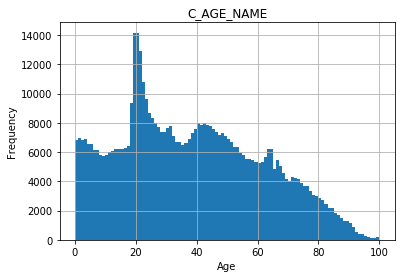

In [22]:
age.hist("C_AGE_NAME", bins = 100)
plt.xlabel("Age")
plt.ylabel("Frequency")

The median age is:

In [23]:
age.C_AGE_NAME.median()

36.0

The mean age is (remember this is the mean of the population, which we wouldn't normally know):

In [24]:
age.C_AGE_NAME.mean()

37.87209832494418

Let's take 1000 samples of 100 people from the population, and make a sampling distribution of these means:

In [25]:
samples = []

for i in range(1000):
    sample = age.sample(n = 100, replace = True, random_state = i)
    sample = sample.C_AGE_NAME.mean()
    samples.append(sample)

samples = pd.Series(samples)

The following is a distribution of the sample means (a sampling distribution):

Text(0, 0.5, 'Frequency')

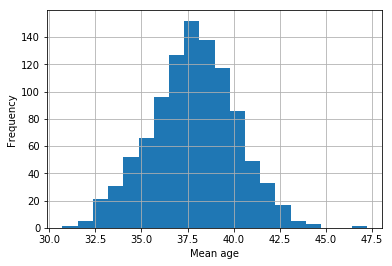

In [26]:
samples.hist(bins = 20)
plt.xlabel("Mean age")
plt.ylabel("Frequency")

Most sample means are around 38, although a few are as low as 32 and as high as 45. Remember we know the population mean, but we wouldn't normally know this.
If we just had access to one sample, how would we know if the resultant sample mean was close to the population mean?

From the histogram of sample means we can see that it's more likely to end up with a sample mean that's close to the population mean than one that's further away, and we can quantify this with a confidence interval.

Let's take one sample of 1000 random cases from the original data set and pretend it's all we have access to:

In [27]:
sample = age.sample(n = 1000, replace = True, random_state = 42)

The mean of this sample is:

In [28]:
sample.C_AGE_NAME.mean()

37.037

This is very close to the population mean but not quite the same.
The standard error of this sample mean is:

In [29]:
sample.C_AGE_NAME.sem()

0.73612329708311

We know that an ideal normal distribution will have [95\% of cases within 1.96 standard deviations of the mean](https://en.wikipedia.org/wiki/Normal_distribution#Standard_deviation_and_coverage).
If we multiply our standard error by $\pm$ 1.96 that therefore defines a 95% confidence interval.
In this case we would have an interval of:

In [30]:
sample.C_AGE_NAME.mean() - 1.96 * sample.C_AGE_NAME.sem()

35.5941983377171

to:

In [31]:
sample.C_AGE_NAME.mean() + 1.96 * sample.C_AGE_NAME.sem()

38.479801662282895

This effectively estimates that if we were to take 100 samples the population mean would fall within these bounds 95 times.
In our example the population mean is indeed within the 95% confidence interval of the sample mean (remember the population mean was:)

In [32]:
age.C_AGE_NAME.mean()

37.87209832494418

To calculate 99% confidence intervals use 2.58 standard deviations rather than 1.96, in this example resulting in a confidence interval between:

In [33]:
sample.C_AGE_NAME.mean() - 2.58 * sample.C_AGE_NAME.sem()

35.13780189352558

and:

In [34]:
sample.C_AGE_NAME.mean() + 2.58 * sample.C_AGE_NAME.sem()

38.93619810647442

Perhaps counterintuitively this results in a wider interval (because the interval ensures the population mean falls within these bounds 99 times instead of 95); it is not 'more precise'.

From the standard error of the mean and confidence interval we can therefore quantify how confident we are that the sample mean is close to the true population mean.

## Comparing means and confidence intervals

A useful property of confidence intervals is that they can be used to compare two or more means to see if they are statistically significantly different.
For example, we have a sample of the ages of people in Sheffield and we could create a similar sample of the ages of people in Eastbourne, calculate the confidence intervals, and compare them to see if they differ (i.e. if, on average, people are older in Eastbourne).

In [35]:
if not os.path.isfile("../data/external/age_eb.csv"):
    age_eb = "https://www.nomisweb.co.uk/api/v01/dataset/NM_1531_1.data.csv?date=latest&geography=1946157295&c_age=1...101&measures=20100&signature=NPK-0c73734c0f725c979cee3a:0x65c03934cecfca562500f65e9cb1bd2083fbea01"
    age_eb = requests.get(age_eb)
    age_eb = age_eb.text
    outfile = open("../data/external/age_eb.csv", "w")
    outfile.write(age_eb)
    
age_eb = pd.read_csv("../data/external/age_eb.csv")
age_eb = age_eb[["C_AGE_NAME", "OBS_VALUE"]]
age_eb.C_AGE_NAME = age_eb.C_AGE_NAME.str.replace("Age under 1", "0")
age_eb.C_AGE_NAME = age_eb.C_AGE_NAME.str.replace(" and over", "")
age_eb.C_AGE_NAME = age_eb.C_AGE_NAME.str.replace("Age ", "")
age_eb.C_AGE_NAME = pd.to_numeric(age_eb.C_AGE_NAME)
sum_obsvalue = age_eb.OBS_VALUE.sum()  # for checks

age_eb = age_eb.loc[age_eb.index.repeat(age_eb["OBS_VALUE"])]

if len(age_eb.index) != sum_obsvalue:
    raise Exception("age_eb data frame not spread correctly")

age_eb = age_eb.drop("OBS_VALUE", axis = 1)

age_eb.describe()

,C_AGE_NAME
count,99412.000000
mean,42.833169
std,24.719087
min,0.000000
25%,22.000000
50%,43.000000
75%,63.000000
max,100.000000


From the table above we can see that the mean *is* higher than the mean for Sheffield, but remember we are comparing populations and we would not typically have access to this information.
Let's take a sample of 1,000 individuals and calculate the mean and standard error of the mean:

In [36]:
sample_eb = age_eb.sample(n = 1000, replace = True, random_state = 42)
sample_eb.C_AGE_NAME.mean()

42.294

So our sample mean is also different, but can we be sure it's different and not just the result of our sampling?'. Using the standard error of the mean our confidence interval is:

In [37]:
sample_eb.C_AGE_NAME.mean() - 1.96 * sample_eb.C_AGE_NAME.sem()

40.757572452123995

and

In [38]:
sample_eb.C_AGE_NAME.mean() + 1.96 * sample_eb.C_AGE_NAME.sem()

43.830427547876

Note that, reassuringly, this interval contains our population mean. Note also that the full interval is higher than the Sheffield interval (i.e. the top of the Sheffield interval is below the bottom of the Eastbourne interval). This means that the mean age of Sheffield and Eastbourne are statistically significantly different at the 95% confidence level.

We can visualise the confidence intervals as:

In [39]:
age_cis = {"town": ["Sheffield", "Eastbourne"],
           "mean": [sample.C_AGE_NAME.mean(), sample_eb.C_AGE_NAME.mean()],
           "sem":  [sample.C_AGE_NAME.sem(), sample_eb.C_AGE_NAME.sem()]}

age_cis = pd.DataFrame.from_dict(age_cis)
age_cis

,town,mean,sem
0,Sheffield,37.037,0.736123
1,Eastbourne,42.294,0.783892


Text(0.5, 0, 'Town')

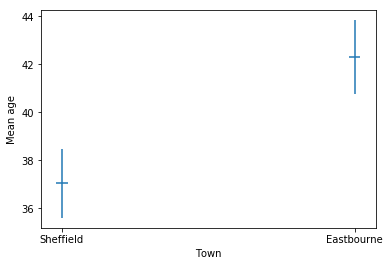

In [40]:
plt.errorbar(
    x = [1, 2], y = age_cis["mean"],
    xerr = 0.02, yerr = 1.96 * age_cis["sem"],
    linestyle = ""
)
plt.xticks([1, 2], age_cis["town"])
plt.ylabel("Mean age")
plt.xlabel("Town")

# Normal distribution

The normal distribution is central to our ability to infer about a population from a sample. The normal distribution looks like this (by Dan Kernler from Wikimedia Commons, CC BY-SA 4.0):

<a title="By Dan Kernler [CC BY-SA 4.0 
 (https://creativecommons.org/licenses/by-sa/4.0
)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Empirical_Rule.PNG"><img width="512" alt="Empirical Rule" src="https://upload.wikimedia.org/wikipedia/commons/a/a9/Empirical_Rule.PNG"></a>

The normal distribution was discovered by Gauss (which is why it's also sometimes called the Gaussian distribution) and described an 'ideal' situation. Lots of data follow this pattern: the height or weight of a population;  The mean of the normal distribution ($\mu$ on the diagram above) is the centre. Because the normal distribution is **symmetrical** we know that 50% of cases fall below and 50% of cases fall above the mean.

Another useful property of the normal distribution is we know, or can calculate, how many cases fall with 1, 2, 3, or more standard deviations of the mean (these are shown as $\mu \pm \sigma; \mu \pm 2\sigma; \mu \pm 3\sigma$ on the figure). These are about 68%, 95%, and 97.5% respectively.

|Number of $\sigma$ from mean | Percent of cases|
|-----------------------------|-----------------|
| 1                           | 68.27%          |
| 1.96                        | 95%             |
| 2                           | 95.45%          |
| 2.58                        | 99%             |
| 3                           | 99.73%          |

Therefore if we know the mean ($\mu$) and standard deviation ($\sigma$) of our sample we can calculate the confidence interval of our sample mean (as we did above). Typically we calculate a 95% confidence interval (although 99% is also common), and this tells us the likely range the population mean falls within. This is why we used the figure 1.96 when calculating our confidence interval earlier, and this is the property that allows us to infer information about the population from our smaller sample.

The other, related, way we can use this information is if we have a mean and standard deviation and observe a data point, we can calculate how many standard deviations from the mean this data point is. We can then see if the observed data point falls within the normal variation we expect (i.e. within 1.96 standard deviations for 95% confidence) or outside it, and is therefore the result of something not within the normal range.

Remember our household weekly income example, after we removed the top--coded responses? It looked something like this:

Text(0, 0.5, 'Frequency')

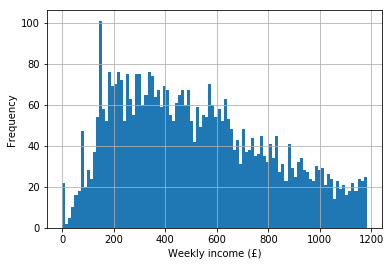

In [41]:
food_trimmed.P344pr.hist(bins = 100)
plt.xlabel("Weekly income (£)")
plt.ylabel("Frequency")

The mean income is:

In [42]:
food_trimmed.P344pr.mean()

518.3056177244473

and the standard deviation is:

In [43]:
food_trimmed.P344pr.std()

290.22464409300136

Now let's imagine we find a respondent who lives in Chelsea and we ask them to complete our survey. They respond that their income is £2,000 per week. Does this fall within the variability we expect, or is it statistically significantly likely that this respondent has a higher income than most? Well, we can calculate how many standard deviations our observed data point is away from the mean. We know:

$$
2000 = \mu + x.\sigma
$$

where $\mu$ is the mean and $x.\sigma$ is the number of standard deviations we want to calculate. If we rearrange the equation we get:

$$
\frac{2000}{\sigma} = \frac{\mu}{\sigma} + x
$$

$$
\frac{(2000 - \mu)}{\sigma} = x
$$

Plugging in the mean and standard deviation we get:

In [44]:
(2000 - food_trimmed.P344pr.mean()) / food_trimmed.P344pr.std()

5.1053362022583775

So our observed data point is more than five standard deviations higher than the mean, which means that if we were to interview 3.5 million people, only one would have an income that high. It's therefore highly likely that this respondent has a higher income than the average. In physics this would be known as a 'five-sigma' result: i.e. the result is more than five standard deviations ($\sigma$) from the mean and is therefore highly unlikely to be through chance alone (in the social sciences we usually opt for the '1.96 sigma' rule).

Not all observed data form a perfect normal distribution (in fact most differ at least slightly). There are two ways we need to describe a distribution if it is different from the normal: skewness and kurtosis.

## Skewness

A normal distribution has its mean, median, and mode at the same point (the centre). Skewness means the data points are skewed one way or the other:

<a title="By Rodolfo Hermans (Godot) at en.wikipedia. [CC BY-SA 3.0 
 (https://creativecommons.org/licenses/by-sa/3.0
)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Negative_and_positive_skew_diagrams_(English).svg"><img width="500" alt="Negative and positive skew diagrams (English)" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/500px-Negative_and_positive_skew_diagrams_%28English%29.svg.png"></a>

Negative skew means the tail is to the left; positive skew means the tail is to the right. In a positively skewed distribution the mode and median are lower than the mean. In a negatively skewed distribution the median and mode are higher than the mean.

## Kurtosis

Kurtosis refers to how bunched (clustered) around the mean the data points are. Positive kurtosis (leptokurtic) means the points are clustered around the mean, making the distribution narrower and taller than a normal distribution. Negative kurtosis (platykurtic) means the data points are spread out more widely, resulting in a distribution that is flatter and broader than a normal distribution.

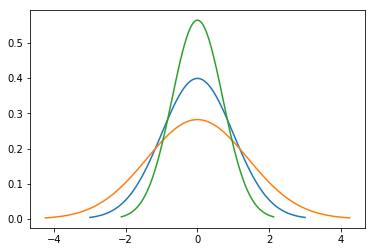

In [45]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
normal = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)  # probability density func
plt.plot(normal, scipy.stats.norm.pdf(normal, mu, sigma))

variance = 2
sigma = math.sqrt(variance)
platykurtic = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(platykurtic, scipy.stats.norm.pdf(platykurtic, mu, sigma))

variance = 0.5
sigma = math.sqrt(variance)
leptokurtic = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(leptokurtic, scipy.stats.norm.pdf(leptokurtic, mu, sigma))

plt.show()

In the figure above:

- the **blue** line is a normal distribution,
- the **green** line is a distribution with positive kurtosis (leptokurtic)
- the **orange** line is a distribution with negative kurtosis (platykurtic)

# Hypothesis testing

So far we've loaded our data set, described it with measures of central tendency and variability, and tested to see if our sample mean adequately describes our population mean.
Now we move on to testing hypotheses.

A hypothesis is a statement that we make to explain a phenomenon that we do not yet know the answer to.
A hypothesis must be testable.

For example, in our data set we have two nominal variables that we might propose there is a relationship between:

- NS-SEC class of the household reference person (`A094r`)
- Tenure (`A121r`)

NS-SEC stands for '[National Statistics Socio--economic classification](https://www.ons.gov.uk/methodology/classificationsandstandards/otherclassifications/thenationalstatisticssocioeconomicclassificationnssecrebasedonsoc2010)', and is a measure of employment grade, for example if the household reference person is a higher manager or professional, or a manual worker.

The [household reference person](https://www.scotlandscensus.gov.uk/variables-classification/household-reference-person) is the person in the household (usually a family) who is full--time employed or, if both partners are full--time employed, the one who is oldest.
This concept is used because families share social, cultural, and economic characteristics so, for example, if one partner is currently unemployed they share some of their characteristics with the HRP (for example they are likely to still live in the family home and participate in similar activities).
Similarly, children who do not yet work can be ascribed economic and social characteristics based on their parent or carer's economic activity.

Tenure simply means if the respondent owns their home (outright, or with a mortgage) or rents their home from a private landlord or council.

With all this in mind, our hypothesis might be:

> There is an association or link between household reference person NS-SEC and home ownership (tenure).

For example, people in NS-SEC category 1 (higher managerial, administrative, and professional occupations) may be more likely to own their home compared to people in routine and manual occupations.

First of all, let's look at a crosstabulation (crosstab) of frequencies comparing these two variables:

In [46]:
pd.crosstab(index = food.A094r, columns = food.A121r, margins = True, margins_name = "Total")

A121r,public rented,private rented,owned,Total
A094r,,,,
1,70,237,1282,1589
2,81,141,469,691
3,289,233,523,1045
4,76,85,39,200
5,364,102,1153,1619
Total,880,798,3466,5144


From this crosstab we can see that similar numbers of people rent their homes from local authorities ('public rented') and private landlords (880 and 798 respectively), but that more than four times as many people own their own home (3466) than rent privately or rent publicly.

We can also see that most people in NS-SEC group 1 (higher managerial, administrative, and professional occupations) own their home (1282) compared to rent (total 307).
If we compare this to NS-SEC group 3 (routine and manual occupations) only 523 own their home, while 289 rent from a local authority (much more than the group 1) and 233 rent privately (similar to group 1).

These descriptions are pretty straightforward, but any analysis is complicated by the fact that the two groups are different sizes (n = 1,589 group 1; n = 1,045 group 2) so we cannot directly compare the counts in this table to see if there are differences between the groups.
The next step is to look at the percentages:

In [47]:
pd.crosstab(
    index = food.A094r, columns = food.A121r,
    normalize = "index"
) * 100  # converts proportions to percentages

A121r,public rented,private rented,owned
A094r,,,
1,4.405286,14.915041,80.679673
2,11.722142,20.405210,67.872648
3,27.655502,22.296651,50.047847
4,38.000000,42.500000,19.500000
5,22.483014,6.300185,71.216800


Using the row percentages (i.e. each row adds up to 100%) we can see that approximately 80% of higher managerial and professional families own their own home, but only 50% of routine and manual families own their own homes.
Similarly we can see that only about 4.5% of managerial and professional families rent from a local authority, but 27% of routine and manual families do (remember rows 4 and 5 are unemployed and unclassified respectively).

So we think there's an association between NS-SEC of the household reference person and tenure, and the crosstabs certainly seem to support this.
Unfortunately humans are very, very good at spotting patterns, even when there isn't one there, so instead of just relying on our say--so we can statistically test to see if there really is a difference.
To do this we use a hypothesis test, of which the most common type is the chi--squared ($\chi ^ 2$) test (the Greek letter is pronounced 'key', but 'kai' is probably more common).

To perform a chi--squared test we specify a *null hypothesis*, which we denote $H_0$.
A null hypothesis is a way of framing our hypothesis that (usually) states there is *no* association between our variables, so in our case we specify our null hypothesis as:

> There is *no* association between NS-SEC of the household reference person and housing tenure

The opposite of the null hypothesis is the *alternative hypothesis*, $H_1$, which is usually our original hypothesis.

It is important to frame a hypothesis test in this way because we assume the absence of an association, and it is up to us as researchers to provide evidence that there is an association.
For example, we cannot assume that people who drink coffee are more intelligent than people who drink tea.
It is up to us to demonstrate that this is the case.
This is what makes our hypothesis *testable* and *falsifiable*.

It's a bit like the presumption of innocence: we cannot be locked up unless we are proven to be guilty of a crime.
If it were the other way around (i.e. presumption of guilt) we would all be incarcerated and we would have to prove that we were innocent, not just of one crime, but of every conveivable crime in order to be released!
This would be an impossible task (not least because no doubt someone would add another charge arbitrarily).

Hermione Granger sums this up better than most statistics textbooks ever did:

> "Well, how can that `[the resurrection stone]` be real?"  
> "Prove that it is not", said Xenophilius.  
> Hermione looked outraged.  
> "But that's --- I'm sorry, but that's completely ridiculous! How can I possibly prove it doesn't exist? Do you expect me to get hold of --- of all the pebbles in the world, and test them? I mean, you could claim that anything's real if the only basis for believing in it is that nobody's *proved* it doesn't exist!  
> - Harry Potter and the Deathly Hallows

To carry out the $\chi ^ 2$ test, the [`scipy.stats.chi2_contingency()`](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html) function returns the following pieces of information:

- The test statistic
- The $p$ value
- The number of [degrees of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics))
- The expected counts

In [48]:
scipy.stats.chi2_contingency(
    pd.crosstab(index = food.A094r, columns = food.A121r, margins = False)
)

(692.331575868431,
 3.203161366324675e-144,
 8,
 array([[ 271.83514774,  246.50505443, 1070.65979782],
        [ 118.21150855,  107.19634526,  465.59214619],
        [ 178.77138414,  162.11314152,  704.11547434],
        [  34.21461897,   31.02643857,  134.75894246],
        [ 276.96734059,  251.15902022, 1090.87363919]]))

The test statistic is, roughly, the amount of variance explained by our test compared to the amount of variance not explained.
In all my years of statistics I have never worked one of these out by hand, so don't worry too much about this.

The degrees of freedom are the the number of independent pieces of information to perform the test on (a bit like we saw earlier with the standard deviation, the DOF used is $n - 1$ because we set the population mean to be the sample mean).
In a cross tab this is the number of rows minus 1, multiplied by the number of columns minus 1, in this case:

In [49]:
(5 - 1) * (3 - 1)

8

This is because, in this example, once we know rows 1--4 we can calculate row 5 because we know the total.
Similarly once we know columns 1--2 we can calculate column 3 because we know the total.

We're not interested in the test statistic or degrees of freedom directly, but these are used to calculate the $p$ value.
We want the $p$ value to be low, by convention at least below 0.05.

In this case the $p$ value is so low it is returned in scientific notation.
The `3.2e-144` means the decimal place is moved 144 places to the left, i.e.:

`0.0000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000003`

So, essentially, zero (in fact it's *highly* dubious that the p value is known to this level of accuracy, so we treat it as essentially zero).
A $p$ value this small means it is very, very unlikely that we would have observed the relationship we did just by chance, so we can say with some confidence that there is an association or link between NS-SEC and housing tenure.

There are a few important assumptions we must satisfy to use a chi--squared test.
One of these is to do with *expected frequencies*, which are used in calculating the actual chi--squared statistic.
In calculating the chi--squared statistic we calculate the expected frequency for each cell.
In our example we have 15 cells in our crosstab, so we calculate 15 expected frequencies.

Specifically we should not have any expected frequencies of 0 (should be at least 1), and no more than 20% of expected frequencies should be less than 5.
To calculate the expected frequency for each cell we use the formula:

$$
E_{ij} = \frac{T_{i} x T_{j}}{N}
$$

where $E_{ij}$ is the expected frequency of cell in row $_i$ and column $_j$; $T_i$ is the total of row $_i$; $T_j$ is the total of column $_j$; and $N$ is the table grand total.
So the expected frequency for row 1, column 1 is:

$$
E_{1, 1}\frac{1589 x 880}{5144}
$$

In [50]:
(1589 * 880) / 5144

271.8351477449456

Which is what is returned by the `scipy.stats.chi_contingency()` function.

When running a chi--square test on a 2x2 contingency table it is likely to produce p values that are too small (i.e. it's more likely to make a false positive or a [type I error](#interpreting-the-results).
To correct this `scipy.stats.chi_contingency()` automatically applies the [**Yates's continuity correction**](https://en.wikipedia.org/wiki/Yates%27s_correction_for_continuity) if you're performing a test on a 2x2 table.
I've never worried about what this is or how it works (although Andy Field's textbook, as usual, covers it in an accessible way); just know that it has been applied when reporting on a 2x2 table.

## Interpreting the results

There are two problems to be aware of when interpreting the results of a hypothesis test.
The hypothesis test does not *prove* an association between our variables; it gives us a statistical level of confidence that there is an association.

There is always a risk that we might reject the null hypothesis (i.e. state that there is an association) when there isn't one.
In our example we have good statistical evidence that there is an association (the $p$ value is very low), but there is still a possibility that this could have simply happened randomly (admittedly a very small chance).

If this were a random occurrence but we stated there was an association this would be called a **Type I (one) error**, sometimes known as a false positive.

The other type of error we could make is failing to reject the null hypothesis when we should (i.e. we state there is no association when there *is* one), also known as a false negative.
This is known as a **Type II (two) error**.

When we perform a hypothesis test we therefore need to balance the risk of stating that there is an association when there isn't, and the risk of stating that there is no association when there is one.

Depending on our research question, one or the other errors might be more problematic.
For example, if we are testing a new drug we want to make sure it is effective, so we do not want to make a type I error (i.e. state that there is an association when there isn't one).
But if we're testing the drug for side effects we want to make sure we don't make a type II error (i.e. assert that there are no side effects when, in fact, there are).

## Directional tests

Two--tailed tests are the default, and what you should use unless you have a very good (and documented!) reason for using a one--tailed test.

One--tailed tests are used when we are carrying out a *directional* test.
For example, we previously tested if there is an association between employment grade (NS--SEC) and housing tenure.
We did not specify a direction, so we would usually use a two--tailed test.
However, if we specified our alternative hypothesis with a direction, we would run a one--tailed test.
For example, if our alternative hypothesis were:

> People of higher employment grade are **more likely** to own their own home

we now have a directional test (i.e. we don't think they're less likely to own their own home).

In this case we can use a one--tailed test.
Note that we have stated our hypothesis **before** we ran the test; you cannot run a one--tailed test after the fact and claim you've found a directional association.
Also note that if you do not find a directional association and later want to switch direction you cannot.
Therefore one--tailed tests tend to be used when previous literature identifies a directional association and you want to use new data to test it.

The reason for this skepticism of one--tailed tests is that they require a smaller difference between the two variables to be statistically significant.
If you are performing a non--directional (two--tailed test) at a confidence level of 0.05, your have half of this at each end of your distribution (0.025) to work with to detect a difference.
If you specify a directional (i.e. one--tailed test) you have more of the distribution to work with to detect a significant difference.

# Effect sizes

Determining that there *is* an association is all very well and good, but it tells us nothing of what the size of the effect is.
For example, our hypothesis test has determined it is probable that there is an association between the employment grade of the household reference person and tenure, but it does not tell us *how much* more likely they are to own their home.

The most common measures of effect size are:

- odds ratio
- Pearson's correlation coefficient, $r$

There are others, for example Cohen's $d$ which is useful if the group sizes are very different, but these are the two most common in the social sciences.

## Odds ratio

The odds ratio is a way of specifying the effect size for 2x2 contingency tables.
For our example of employment grade and housing tenure we have more than a 2x2 table, but we can restate it so instead of just measuring an association between all employment grades and tenure types we can calculate the odds ratio of professional and managerial respondents owning their home and routine and manual respondents owning their home.

Here's a reminder of the frequencies of all employment grades and tenure types:

In [51]:
pd.crosstab(index = food.A094r, columns = food.A121r, margins = True, margins_name = "Total")

A121r,public rented,private rented,owned,Total
A094r,,,,
1,70,237,1282,1589
2,81,141,469,691
3,289,233,523,1045
4,76,85,39,200
5,364,102,1153,1619
Total,880,798,3466,5144


The odds ratio is the odds of one group for the event of interest divided by the odds of the other group for the event of interest.
So we need to sets of odds.

First we specify the odds of the professional and managerial group owning their own home.
This is the number of professional respondents who own their home (1282), divided by the number of professional respondents who *do not* own their home (70 + 237):

In [52]:
1282 / (70 + 237)

4.175895765472313

This means that, roughly, for every professional and managerial respondent who *does not* own their home there are four who do.

Similarly the odds of a routine and manual respondent owning their home is the number of routine and manual respondents who own their home (523) divided by the number of routine and manual respondents who *do not* own their own home (289 + 233):

In [53]:
523 / (289 + 233)

1.0019157088122606

This means that, roughly, for every routine and manual respondent who *does not* own their home there is one who does, so the odds are about equal or 1:1.

The odds ratio is simply one divided by the other:

In [54]:
(1282 / (70 + 237)) / (523 / (289 + 233))

4.167911261140626

What this means is that professional and managerial respondents are 4.168 times more likely to own their home than routine and manual respondents.

## Pearson's correlation coefficient, $r$

$r$ is standardised, which is useful because:

- tests of all sorts of units can be compared which each other,
- the result is between -1 (perfect negative association), through 0 (no association), and 1 (perfect effect)

$r$ is a measure of effect size (or correlation) between two numerical variables.
It works on the principle that as the difference from the mean for one variable increases we expect the difference from the mean for the related variable to increase (positive correlation) or decrease (negative correlation).

For example the mean income is:

In [55]:
food_trimmed.P344pr.mean()

518.3056177244473

Let's say we hypothesise that people with higher incomes spend more money on food (they have more money to shop at Waitrose).
Expenditure is top--coded, so let's trim the data like we did for income and take a look at the resulting distribution:

Text(0, 0.5, 'Frequency')

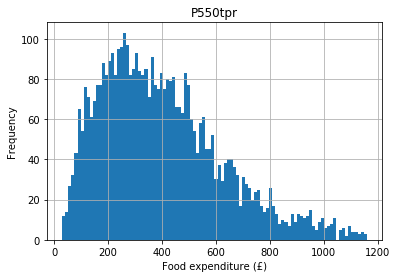

In [56]:
food_trimmed = food_trimmed[food_trimmed.P550tpr < food_trimmed.P550tpr.max()]
food_trimmed.hist(column = "P550tpr", bins = 100)
plt.xlabel("Food expenditure (£)")
plt.ylabel("Frequency")

The mean expenditure is:

In [57]:
food_trimmed.P550tpr.mean()

400.63890310982424

If we take an individual with a high income (their income deviates from the mean) we would expect their expenditure to also deviate from the expenditure mean.
These deviations from the mean are their variances, so we are stating that we expect income and expenditure on food to **covary**.
This principle is used to calculate the **Pearson correlation coefficient** (usually just called the correlation), which is a standardised measure of how much the two variables vary together.

In [58]:
scipy.stats.pearsonr(
    food_trimmed["P344pr"], food_trimmed["P550tpr"]
)

(0.6317428068963729, 0.0)

In this example the first number is the correlation coefficient and the second number is its associated $p$ value.

The correlation is positive so as income goes up, expenditure on food goes up (if it were negative it would be a negative correlation, which would state that as income went up expenditure on food went down for some reason).
The value of 0.63 suggests quite a lot of the variance in expenditure is accounted for by income (so the correlation is strong).

The $p$ value is $<< 0.01$ ($<<$ means 'much less than') so it is highly improbable we would see a correlation this large by chance alone, so we have strong evidence to reject the null hypothesis and conclude that there is an association between income and expenditure on food.

### Assumptions

Pearson's correlation coefficient assumes that both variables are numeric and normally distributed for the $p$ value to be accurate.
In this case our variables are numeric (income and expenditure) so this assumption is met.

Neither variable should have any outliers (defined as any value greater than the mean + 3.29 standard deviations).
For income this is ok:

In [59]:
len(
    food_trimmed[food_trimmed.P344pr > 
                 food_trimmed.P344pr.mean() + (3.29 * food_trimmed.P344pr.std())]
)

0

But there are a few outliers for the expenditure variable:

In [60]:
len(
    food_trimmed[food_trimmed.P550tpr > 
                 food_trimmed.P550tpr.mean() + (3.29 * food_trimmed.P550tpr.std())]
)

4

To be safe, let's remove these:

In [61]:
food_trimmed = food_trimmed[food_trimmed.P550tpr < food_trimmed.P550tpr.mean() + (3.29 * food_trimmed.P550tpr.std())]

A scatterplot of these two variables:

Text(0, 0.5, 'Expenditure')

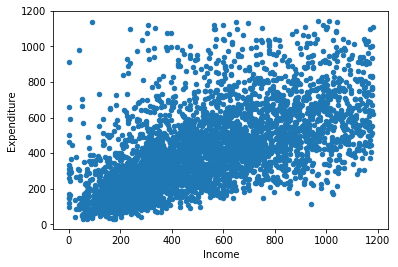

In [62]:
food_trimmed.plot.scatter("P344pr", "P550tpr")
plt.xlabel("Income")
plt.ylabel("Expenditure")

The points should be linear (i.e. a straight line) and roughly cylindrical to meet the assumptions.
If it's too conincal it means the deviances aren't consistent (heteroskedasticity).

If these assumptions aren't true of our data we can use **Spearman's $\rho$** (pronounced 'row').
Spearman's $\rho$ is also useful when we have a numeric variable and an ordinal variable (something we couldn't test with Pearson's $r$).

This is a **non--parametric** test.
Non--parametric tests tend to be more robust (which is why we can use them when we violate some of the assumptions of the parametric equivalents, in this case Pearon's $r$) but sometimes have lower statistical power.
Therefore, try to use the parametric version by default and switch to the non--parametric version when necessary.

In [63]:
scipy.stats.spearmanr(
    food_trimmed["P344pr"], food_trimmed["P550tpr"]
)

SpearmanrResult(correlation=0.6908560599405571, pvalue=0.0)

As you can see in this example the correlation statistic is very similar and the $p$ value is still significant ($<< 0.01$).